In [93]:
%cd ..

/fs01


/h/abbasgln/.conda/envs/mttt/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [94]:
import math
import os
from dotenv import load_dotenv
# Loading environment variables
load_dotenv()

import sys
sys.path.append(os.getenv("PROJECT_PATH"))


import torch
import torch.nn as nn
import torch.nn.functional as F
import typing as tp
import numpy as np
import torch.optim as optim
from torch.utils.data import DataLoader
from dataclasses import dataclass, field
import logging
import wandb

import medAI
from medAI.utils.setup import BasicExperiment, BasicExperimentConfig

from utils.metrics import MetricCalculator

from timm.optim.optim_factory import create_optimizer

from einops import rearrange, repeat
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import timm

from copy import copy, deepcopy
import pandas as pd

from datasets.datasets import ExactNCT2013RFImagePatches
from medAI.datasets.nct2013 import (
    KFoldCohortSelectionOptions,
    LeaveOneCenterOutCohortSelectionOptions, 
    PatchOptions
)


In [95]:
LEAVE_OUT='PCC'

In [96]:
group=f"offline_MIEnsmMemo_noaug_e-1lr_gn_3ratio_loco"
save_dir = f"/ssd005/projects/exactvu_pca/checkpoint_store/Mahdi/saved_logits/{group}/{LEAVE_OUT}"
logits_labels = torch.load(f"{save_dir}/core_id_probs_labels.pth")
core_id_probs = logits_labels['core_id_probs']
core_id_labels = logits_labels['core_id_labels']
core_probs = probs = torch.stack([torch.stack(probs_list).mean(dim=0) for id, probs_list in core_id_probs.items()])   
core_labels = torch.stack([labels_list[0] for id, labels_list in core_id_labels.items()])
import torchmetrics
torchmetrics.functional.auroc(core_probs, core_labels, task="multiclass", num_classes=2, thresholds=np.arange(0.,1.,0.0001).tolist())

tensor(0.7060)

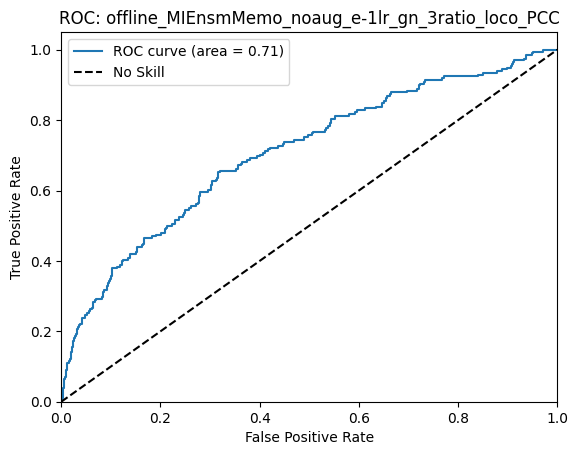

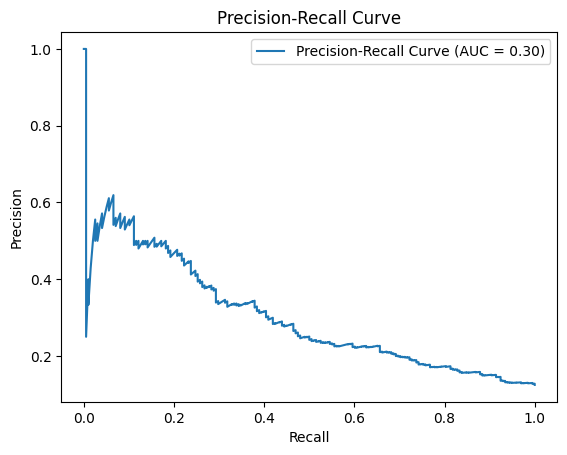

In [97]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(core_labels.numpy(), core_probs.numpy()[:,1]) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC: {group}_{LEAVE_OUT}')
plt.legend()
plt.show()

precision, recall, thresholds = precision_recall_curve(core_labels.numpy(), core_probs.numpy()[:,1]) 
auc_score = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [98]:
group=f"offline_MIensemble_10mi_5mdls_3ratio_gn_loco2"
save_dir = f"/ssd005/projects/exactvu_pca/checkpoint_store/Mahdi/saved_logits/{group}/{LEAVE_OUT}"
logits_labels = torch.load(f"{save_dir}/core_id_probs_labels.pth")
core_id_probs = logits_labels['core_id_probs']
core_id_labels = logits_labels['core_id_labels']
core_probs = probs = torch.stack([torch.stack(probs_list).mean(dim=0) for id, probs_list in core_id_probs.items()])   
core_labels = torch.stack([labels_list[0] for id, labels_list in core_id_labels.items()])
import torchmetrics
torchmetrics.functional.auroc(core_probs, core_labels, task="multiclass", num_classes=2, thresholds=np.arange(0.,1.,0.0001).tolist())

tensor(0.6952)

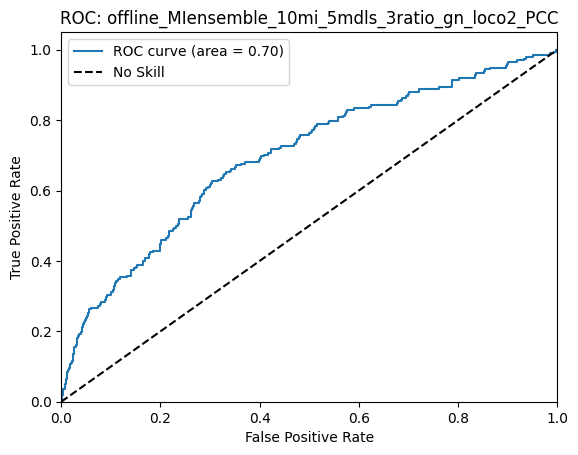

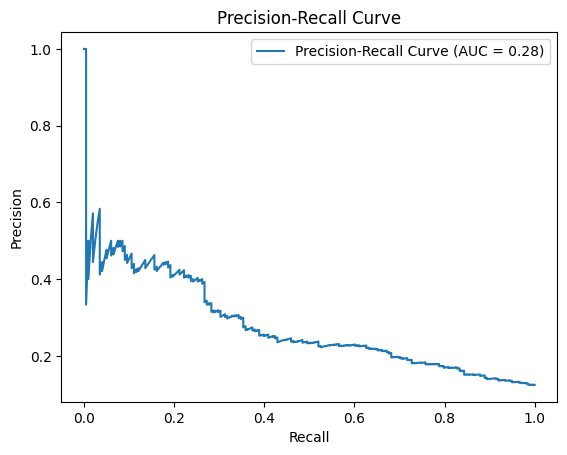

In [99]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(core_labels.numpy(), core_probs.numpy()[:,1]) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC: {group}_{LEAVE_OUT}')
plt.legend()
plt.show()

precision, recall, thresholds = precision_recall_curve(core_labels.numpy(), core_probs.numpy()[:,1]) 
auc_score = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [100]:
group=f"offline_ensemble_5mdls_gn_3ratio_loco"
save_dir = f"/ssd005/projects/exactvu_pca/checkpoint_store/Mahdi/saved_logits/{group}/{LEAVE_OUT}"
logits_labels = torch.load(f"{save_dir}/core_id_probs_labels.pth")
core_id_probs = logits_labels['core_id_probs']
core_id_labels = logits_labels['core_id_labels']
core_probs = probs = torch.stack([torch.stack(probs_list).mean(dim=0) for id, probs_list in core_id_probs.items()])   
core_labels = torch.stack([labels_list[0] for id, labels_list in core_id_labels.items()])
import torchmetrics
torchmetrics.functional.auroc(core_probs, core_labels, task="multiclass", num_classes=2, thresholds=np.arange(0.,1.,0.0001).tolist())

tensor(0.6690)

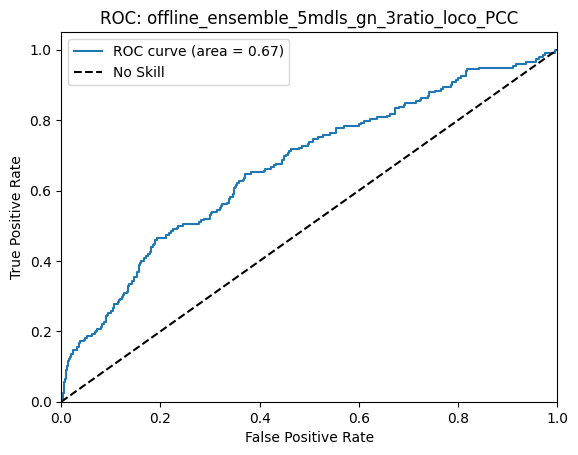

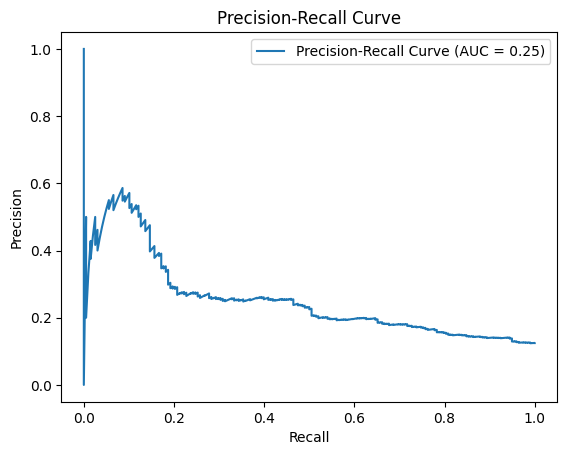

In [101]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(core_labels.numpy(), core_probs.numpy()[:,1]) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC: {group}_{LEAVE_OUT}')
plt.legend()
plt.show()

precision, recall, thresholds = precision_recall_curve(core_labels.numpy(), core_probs.numpy()[:,1]) 
auc_score = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()